<a href="https://colab.research.google.com/github/Prakharprasun/House-Price-Prediction-MLPP2/blob/main/Ames_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#By: Prakhar Prasun, This is an Ames Housing Price Prediction Model that uses pandas, numpy, matplotlib, sklearn, tensorflow and xgboost
#to try to find the best model to predict house pricing

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd

In [50]:
#reading data using pandas

In [51]:
data=pd.read_csv("/content/drive/MyDrive/ML Datasets/AmesHousing.csv")

In [52]:
data=pd.DataFrame(data)
data.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [54]:
#feature engineering 2 features : TotalArea and PriceperArea

In [55]:
data['TotalArea']=(data['Lot Area']+data['Mas Vnr Area']+data['Gr Liv Area']+data['Garage Area']+data['Pool Area'])
data['PriceperArea']=(data['SalePrice']/data['TotalArea'])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [57]:
#making dataframe df

In [58]:
df=pd.DataFrame(data)

In [59]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalArea,PriceperArea
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,34066.0,6.311278
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,13248.0,7.925725
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,16016.0,10.739261
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,13792.0,17.691415
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,15941.0,11.912678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,GdPrv,NaN,0,3,2006,WD,Normal,142500,9528.0,14.955919
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,MnPrv,NaN,0,6,2006,WD,Normal,131000,10271.0,12.754357
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,MnPrv,Shed,700,7,2006,WD,Normal,132000,11411.0,11.567785
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2006,WD,Normal,170000,11817.0,14.386054


In [60]:
#one hot encoding non numeric data

In [61]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

In [62]:
df_encoded

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,False,False,False,False,True,False,False,False,True,False
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,False,False,False,False,True,False,False,False,True,False
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,False,False,False,False,True,False,False,False,True,False
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,False,False,False,False,True,False,False,False,True,False
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,False,False,False,False,True,False,False,False,True,False
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,False,False,False,False,True,False,False,False,True,False
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,False,False,False,False,True,False,False,False,True,False


In [63]:
print(df_encoded.dtypes)

Order                       int64
PID                         int64
MS SubClass                 int64
Lot Frontage              float64
Lot Area                    int64
                           ...   
Sale Condition_AdjLand       bool
Sale Condition_Alloca        bool
Sale Condition_Family        bool
Sale Condition_Normal        bool
Sale Condition_Partial       bool
Length: 265, dtype: object


In [64]:
#fixing boolvalues that crept in

In [65]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
print("Boolean Columns:", bool_cols)

df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded

Boolean Columns: Index(['MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave',
       'Alley_Pave', 'Lot Shape_IR2', 'Lot Shape_IR3',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=224)


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,0,0,0,0,1,0,0,0,1,0
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,0,0,0,0,1,0,0,0,1,0
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,0,0,0,0,1,0,0,0,1,0
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,0,0,0,0,1,0,0,0,1,0


In [66]:
#plotting area and price to gain insights

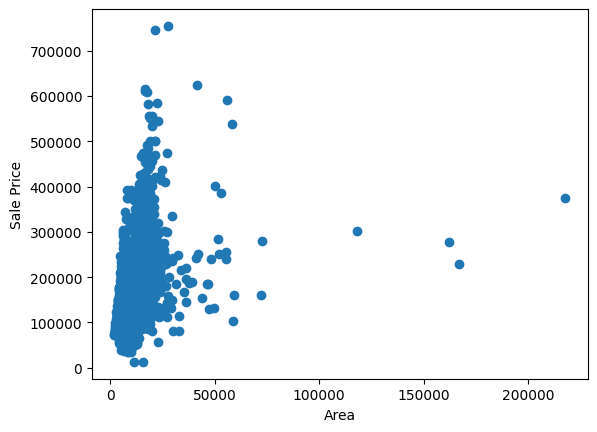

In [67]:
import matplotlib.pyplot as plt
plt.scatter(df['TotalArea'], df['SalePrice'])
plt.xlabel('Area')
plt.ylabel('Sale Price')
plt.show()

In [68]:
#Scaling data using StandardScaler by scikit learn

In [69]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_encoded.select_dtypes(include=['number']).columns

scaler = StandardScaler()

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [70]:
X_train=df_encoded.drop('SalePrice',axis=1)
y_train=df['SalePrice']

In [71]:
X_train

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,-1.731460,-0.997164,-0.877005,3.072506,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,0.056417,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
1,-1.730277,-0.996904,-0.877005,0.461265,0.187097,-0.776079,0.393091,-0.342468,-1.115542,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
2,-1.729095,-0.996899,-0.877005,0.504073,0.522814,-0.067254,0.393091,-0.441674,-1.259380,0.034081,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
3,-1.727913,-0.996888,-0.877005,1.017759,0.128458,0.641571,-0.506718,-0.110988,-0.779919,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
4,-1.726731,-0.992903,0.061285,0.204422,0.467348,-0.776079,-0.506718,0.848000,0.658466,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.726731,1.106582,0.530430,-1.379445,-0.280621,-0.067254,0.393091,0.418109,-0.012780,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
2926,1.727913,1.106588,-0.877005,NaN,-0.160296,-0.776079,-0.506718,0.385040,-0.060726,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
2927,1.729095,1.107245,0.647716,-0.309265,0.037199,-0.776079,-0.506718,0.682657,0.370789,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
2928,1.730277,1.110954,-0.877005,0.332844,-0.017506,-0.776079,-0.506718,0.087423,-0.444296,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072


In [72]:
y_train

,SalePrice
0,215000
1,105000
2,172000
3,244000
4,189900
...,...
2925,142500
2926,131000
2927,132000
2928,170000


In [73]:
#fixing nan values by using fillna

In [74]:
X_train.fillna(X_train.mean())

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,-1.731460,-0.997164,-0.877005,3.072506e+00,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,0.056417,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
1,-1.730277,-0.996904,-0.877005,4.612653e-01,0.187097,-0.776079,0.393091,-0.342468,-1.115542,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
2,-1.729095,-0.996899,-0.877005,5.040725e-01,0.522814,-0.067254,0.393091,-0.441674,-1.259380,0.034081,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
3,-1.727913,-0.996888,-0.877005,1.017759e+00,0.128458,0.641571,-0.506718,-0.110988,-0.779919,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
4,-1.726731,-0.992903,0.061285,2.044220e-01,0.467348,-0.776079,-0.506718,0.848000,0.658466,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.726731,1.106582,0.530430,-1.379445e+00,-0.280621,-0.067254,0.393091,0.418109,-0.012780,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
2926,1.727913,1.106588,-0.877005,1.572513e-16,-0.160296,-0.776079,-0.506718,0.385040,-0.060726,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
2927,1.729095,1.107245,0.647716,-3.092646e-01,0.037199,-0.776079,-0.506718,0.682657,0.370789,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072
2928,1.730277,1.110954,-0.877005,3.328437e-01,-0.017506,-0.776079,-0.506718,0.087423,-0.444296,-0.568996,...,-0.052324,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072


In [75]:
#fixing nan values by using SimpleImputer by scikit learn

In [76]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X_train)

X_train_imputed = imputer.transform(X_train)

X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)

print(X_train)

         Order       PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0    -1.731460 -0.997164    -0.877005  3.072506e+00  2.744381     -0.067254   
1    -1.730277 -0.996904    -0.877005  4.612653e-01  0.187097     -0.776079   
2    -1.729095 -0.996899    -0.877005  5.040725e-01  0.522814     -0.067254   
3    -1.727913 -0.996888    -0.877005  1.017759e+00  0.128458      0.641571   
4    -1.726731 -0.992903     0.061285  2.044220e-01  0.467348     -0.776079   
...        ...       ...          ...           ...       ...           ...   
2925  1.726731  1.106582     0.530430 -1.379445e+00 -0.280621     -0.067254   
2926  1.727913  1.106588    -0.877005  1.572513e-16 -0.160296     -0.776079   
2927  1.729095  1.107245     0.647716 -3.092646e-01  0.037199     -0.776079   
2928  1.730277  1.110954    -0.877005  3.328437e-01 -0.017506     -0.776079   
2929  1.731460  1.111225     0.061285  2.044220e-01 -0.066118      0.641571   

      Overall Cond  Year Built  Year Remod/Add  Mas

In [77]:
#split into train, validation and test

In [78]:
split_1 = int(0.6 * len(X_train))
split_2 = int(0.8 * len(X_train))

X_train, X_val, X_test = X_train[:split_1], X_train[split_1:split_2], X_train[split_2:]
y_train, y_val, y_test = y_train[:split_1], y_train[split_1:split_2], y_train[split_2:]

Let's try to predict the SalesPrice by diffrent techniques
like Neural Networks, Gradient Boosting, Random Forests

In [79]:
#First by NN(tensorflow)

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

In [81]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

In [83]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 40468094976.0000 - mse: 40468094976.0000 - val_loss: 39521693696.0000 - val_mse: 39521693696.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38378315776.0000 - mse: 38378315776.0000 - val_loss: 39519965184.0000 - val_mse: 39519965184.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 39109464064.0000 - mse: 39109464064.0000 - val_loss: 39516413952.0000 - val_mse: 39516413952.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40982945792.0000 - mse: 40982945792.0000 - val_loss: 39509430272.0000 - val_mse: 39509430272.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39373152256.0000 - mse: 39373152256.0000 - val_loss: 39496880128.0000 - val_mse: 39496880128.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39012528128.0000 - mse: 39012528128.0000 - val_loss: 39476056064.0000 - val_mse: 39476056064.0000
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

In [84]:
y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {train_mse}")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train MSE: 2279020212.3442407


In [85]:
y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test MSE: 5543950419.412305


In [86]:
#then by Random Forest(scikit learn)

In [87]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {train_mse}")

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

Train MSE: 63595827.75066701
Test MSE: 606379418.8568879


In [88]:
#then by Gradient Boosting(xgboost)

In [89]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {train_mse}")

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

Train MSE: 0.0016817547491114837
Test MSE: 575147870.4662652


In [92]:
print(f"It seems xgboost(Gradient Boosting) works best, and we achieved Train MSE: {train_mse} and Test MSE: {test_mse}")

It seems xgboost(Gradient Boosting) works best, and we achieved Train MSE: 0.0016817547491114837 and Test MSE: 575147870.4662652


In [91]:
rmse = np.sqrt(test_mse)
average_price = df['SalePrice'].mean()
rmse_percentage = (rmse / average_price) * 100

def categorize_rmse_percentage(rmse_percentage):
    if rmse_percentage <= 5:
        return "Perfect"
    elif 5 < rmse_percentage <= 10:
        return "Great"
    elif 10 < rmse_percentage <= 15:
        return "Good"
    elif 15 < rmse_percentage <= 20:
        return "Fair"
    else:
        return "Needs Improvement"

print(f"RMSE as a percentage of average house price appears to be {rmse_percentage}% , which can be considered {categorize_rmse_percentage(rmse_percentage)}")

RMSE as a percentage of average house price appears to be 13.264802740539134% , which can be considered Good
